In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# import scipy.stats as stats


In [2]:
#load database
df = pd.read_csv("../6_Tematic_extraction/bare_final_database.csv", low_memory = True, delimiter=",", index_col=0)

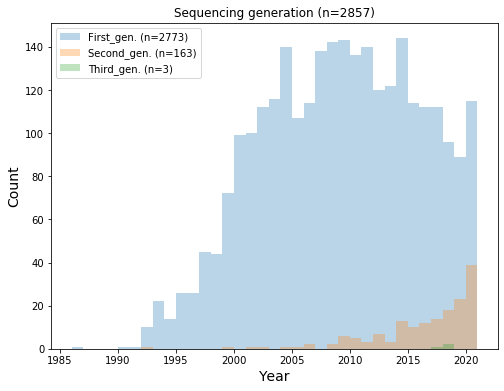

In [3]:
plt.figure(figsize=(8,6))
name = "Sequencing generation"

fields = ["t.First_gen.", "t.Second_gen.", "t.Third_gen."]
n_global = df[fields].notnull().any(axis=1).sum()

for set in fields:
    data = df[df[set] == 1]["c.year"]
    w = 1
    n = math.ceil((data.max() - data.min())/w)
    plt.hist(data, bins=n, alpha=0.3, label=f"{set[2:]} (n={data.shape[0]})")

plt.xlabel("Year", size=14)
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={n_global})")
plt.legend(loc='upper left')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

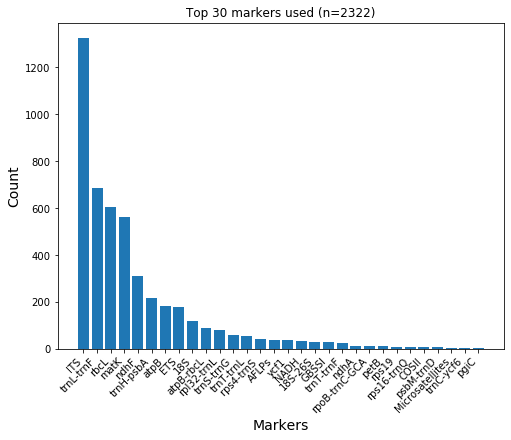

In [4]:
#most studied families
name = "Top 30 markers used"

plt.figure(figsize=(8,6))


data = df["t.markers"].dropna()

master_list = []
#split cells extend a master list
for i in data:
    master_list.extend(i.split(","))

#calculate frequencies for each marker
from itertools import groupby
m_freq = {value: len(list(freq)) for value, freq in groupby(sorted(master_list))}

sorted_freq = {k: v for k, v in sorted(m_freq.items(), key=lambda item: item[1], reverse=True)}
# print(sorted_families_freq)

top = {k: sorted_freq[k] for k in list(sorted_freq.keys())[:30]}

plt.bar(*zip(*top.items()))

plt.xlabel("Markers", size=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={data.shape[0]})")

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

In [39]:
#lineas de tiempo de los marcadores para ver el uso y desuso en el tiempo

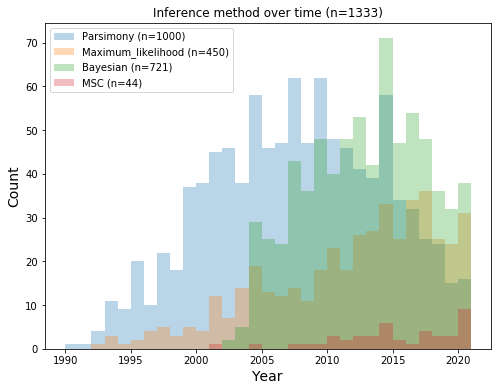

In [5]:
plt.figure(figsize=(8,6))
name="Inference method over time"

fields = ["t.Parsimony", "t.Maximum_likelihood", "t.Bayesian", "t.MSC"]
n_global = df[fields].notnull().any(axis=1).sum()


for set in fields:
    data = df[df[set] == 1]["c.year"]
    w = 1
    n = math.ceil((data.max() - data.min())/w)
    plt.hist(data, bins=n, alpha=0.3, label=f"{set[2:]} (n={data.shape[0]})", )

plt.xlabel("Year", size=14)
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={n_global})")
plt.legend(loc='upper left')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

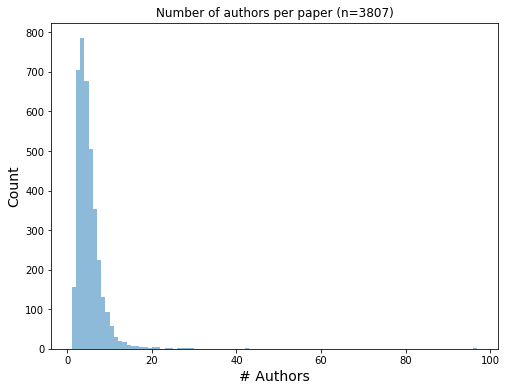

In [6]:
plt.figure(figsize=(8,6))
name="Number of authors per paper"


n_global = (df["s.n_authors"] != "ERROR").shape[0]

data = pd.to_numeric(df[df["s.n_authors"] != "ERROR"]["s.n_authors"])
w = 1
n = math.ceil((data.max() - data.min())/w)
plt.hist(data, bins=n, alpha=0.5, label="#authors")

plt.xlabel("# Authors", size=14)
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={n_global})")
# plt.legend(loc='upper left')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

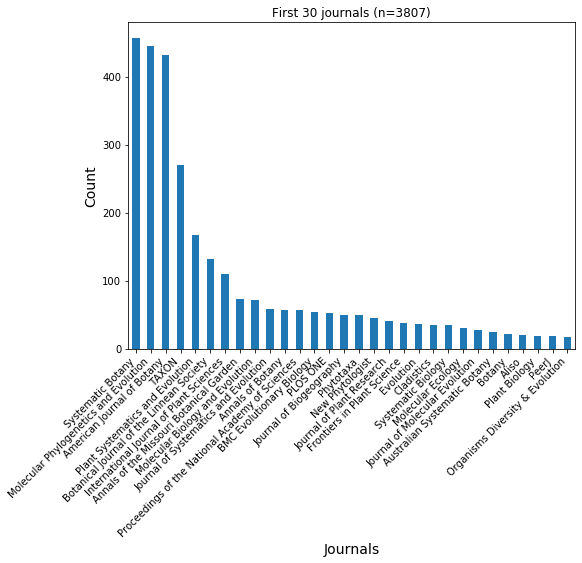

In [7]:
plt.figure(figsize=(8,6))
name="First 30 journals"


data = df["c.journal"].value_counts()[:30].sort_values(ascending=False)
data.plot.bar()

plt.xlabel("Journals", size=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={df[df['c.journal'].notnull()].shape[0]})")

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

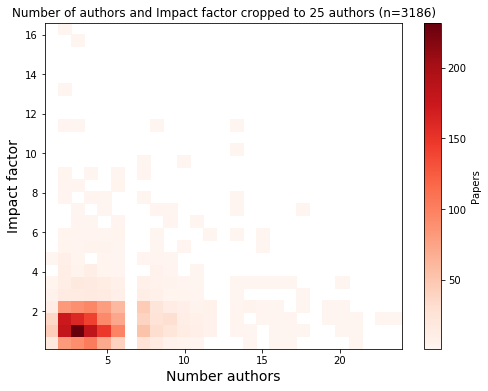

In [8]:
plt.figure(figsize=(8,6))
name = "Number of authors and Impact factor cropped to 25 authors"


aut_sjr = df[df["s.n_authors"] != "ERROR"]
aut_sjr = aut_sjr[pd.to_numeric(aut_sjr["s.n_authors"]) <= 25]
aut_sjr = aut_sjr[["s.n_authors","s.sjr"]].dropna()

x = pd.to_numeric(aut_sjr["s.n_authors"])
y = pd.to_numeric(aut_sjr["s.sjr"]) 

plt.hist2d(x,y , bins=27, cmap='Reds', cmin = 1)
cb = plt.colorbar()
cb.set_label('Papers')

plt.xlabel("Number authors", size=14)
plt.ylabel("Impact factor", size=14)
plt.title(f"{name} (n={aut_sjr.shape[0]})")

# plt.hexbin(x, y, gridsize=50, cmap='Blues')
# cb = plt.colorbar(label='count in bin')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

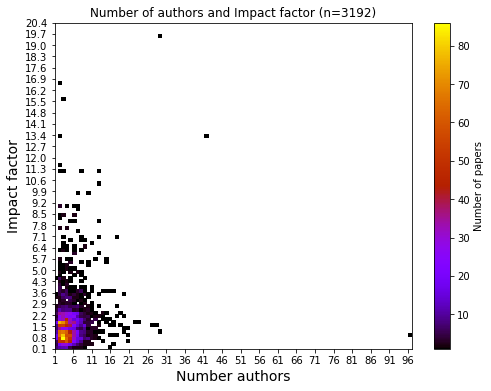

In [9]:
plt.figure(figsize=(8,6))
name = "Number of authors and Impact factor"


aut_sjr = df[df["s.n_authors"] != "ERROR"]
aut_sjr = aut_sjr[["s.n_authors","s.sjr"]].dropna()

x = pd.to_numeric(aut_sjr["s.n_authors"])
y = pd.to_numeric(aut_sjr["s.sjr"]) 


plt.hist2d(x,y , bins=100, cmap='gnuplot', cmin = 1)

cb = plt.colorbar()
cb.set_label('Number of papers')

plt.xlabel("Number authors", size=14)
plt.ylabel("Impact factor", size=14)
plt.title(f"{name} (n={aut_sjr.shape[0]})")

plt.xticks(np.arange(min(x), max(x)+1, 5))
plt.yticks(np.arange(min(y), max(y)+1, 0.7))

# plt.hexbin(x, y, gridsize=50, cmap='Blues')
# cb = plt.colorbar(label='count in bin')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

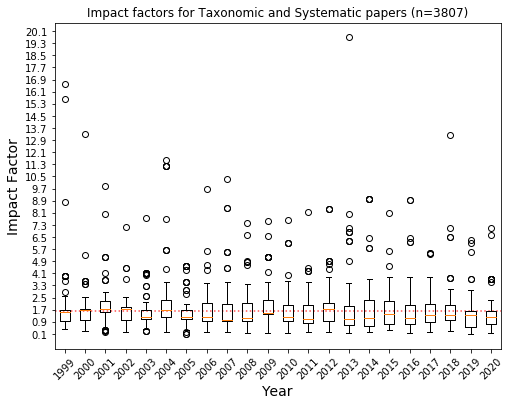

In [11]:
plt.figure(figsize=(8,6))
name="Impact factors for Taxonomic and Systematic papers"

min_year = 1999 #df["c.year"].min()
max_year = int(df["c.year"].max())


series = {}
for year in range(min_year, max_year):
    series[year] = list(df[df["c.year"] == year]["s.sjr"].dropna())


plt.axhline(y=df["s.sjr"].mean(), color='red', linestyle='dotted', alpha=0.7, zorder=-1)

plt.boxplot(series.values(), labels=series.keys())#, meanline=True, showmeans=True)
plt.xticks(rotation=45)
plt.xlabel("Year", size=14)
plt.ylabel("Impact Factor", size=14)
plt.title(f"{name} (n={n_global})")

plt.yticks(np.arange(df["s.sjr"].min(), df["s.sjr"].max()+1, 0.8))


plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


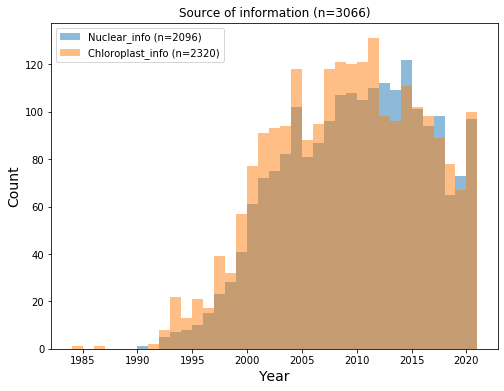

In [12]:
plt.figure(figsize=(8,6))
name ="Source of information"

fields = ["t.Nuclear_info", "t.Chloroplast_info"]

n_global = df[fields].notnull().any(axis=1).sum()

for set in fields:
    data = df[df[set] == 1]["c.year"]
    w = 1
    n = math.ceil((data.max() - data.min())/w)
    plt.hist(data, bins=n, alpha=0.5, label=f"{set[2:]} (n={data.shape[0]})", )

plt.xlabel("Year", size=14)
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={n_global})")
plt.legend(loc='upper left')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

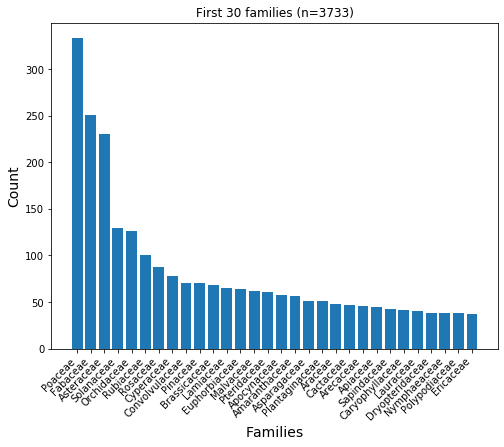

In [13]:
#most studied families
plt.figure(figsize=(8,6))
name="First 30 families"

#Because in the search for families a name only 
#is retrieved once from the abstract and title, 
#each family could be considered specific for each paper
#If three papers have Asteraceae, the list will have 3 Asteraceae.
#So counting the number of Asteraceae will give us the number of 
#papers that include that family

data = df["t.families"].dropna()

master_list_families = []
#split families and extend a master list
for i in data:
    master_list_families.extend(i.split(","))

#calculate frequencies for each family
from itertools import groupby
families_freq = {value: len(list(freq)) for value, freq in groupby(sorted(master_list_families))}

sorted_families_freq = {k: v for k, v in sorted(families_freq.items(), key=lambda item: item[1], reverse=True)}
# print(sorted_families_freq)

top_families = {k.capitalize(): sorted_families_freq[k] for k in list(sorted_families_freq.keys())[:30]}
# print(top_families)

plt.bar(*zip(*top_families.items()))

plt.xlabel("Families", size=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={data.shape[0]})")

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

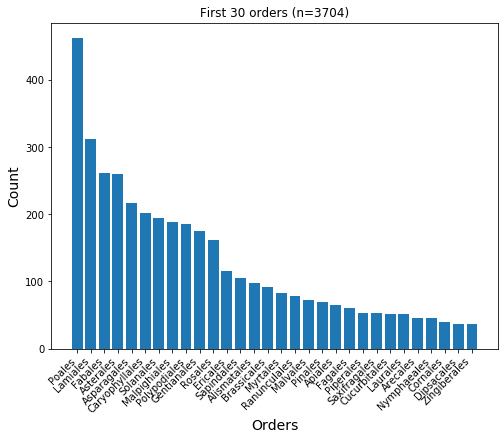

In [14]:
#most studied families
plt.figure(figsize=(8,6))
name="First 30 orders"

#Because in the search for families a name only 
#is retrieved once from the abstract and title, 
#each family could be considered specific for each paper
#If three papers have Asteraceae, the list will have 3 Asteraceae.
#So counting the number of Asteraceae will give us the number of 
#papers that include that family

data = df["t.orders"].dropna()

master_list_families = []
#split families and extend a master list
for i in data:
    master_list_families.extend(i.split(","))

#calculate frequencies for each family
from itertools import groupby
families_freq = {value: len(list(freq)) for value, freq in groupby(sorted(master_list_families))}

sorted_families_freq = {k: v for k, v in sorted(families_freq.items(), key=lambda item: item[1], reverse=True)}
# print(sorted_families_freq)

top_families = {k.capitalize(): sorted_families_freq[k] for k in list(sorted_families_freq.keys())[:30]}
# print(top_families)

plt.bar(*zip(*top_families.items()))

plt.xlabel("Orders", size=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={data.shape[0]})")

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

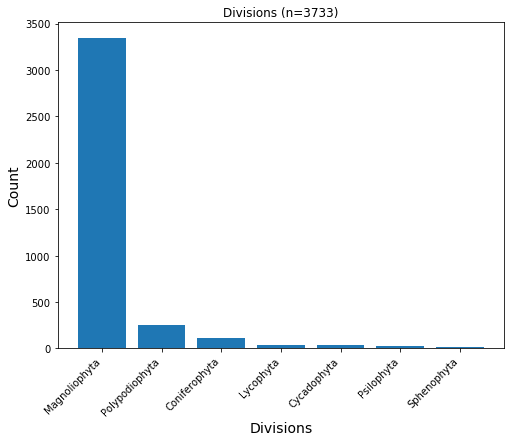

In [16]:
#most studied families
plt.figure(figsize=(8,6))
name="Divisions"

#Because in the search for families a name only 
#is retrieved once from the abstract and title, 
#each family could be considered specific for each paper
#If three papers have Asteraceae, the list will have 3 Asteraceae.
#So counting the number of Asteraceae will give us the number of 
#papers that include that family

data = df["t.divisions"].dropna()

master_list_families = []
#split families and extend a master list
for i in data:
    master_list_families.extend(i.split(","))

#calculate frequencies for each family
from itertools import groupby
families_freq = {value: len(list(freq)) for value, freq in groupby(sorted(master_list_families))}

sorted_families_freq = {k: v for k, v in sorted(families_freq.items(), key=lambda item: item[1], reverse=True)}
# print(sorted_families_freq)

top_families = {k.capitalize(): sorted_families_freq[k] for k in list(sorted_families_freq.keys())}
# print(top_families)

plt.bar(*zip(*top_families.items()))

plt.xlabel("Divisions", size=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={data.shape[0]})")

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

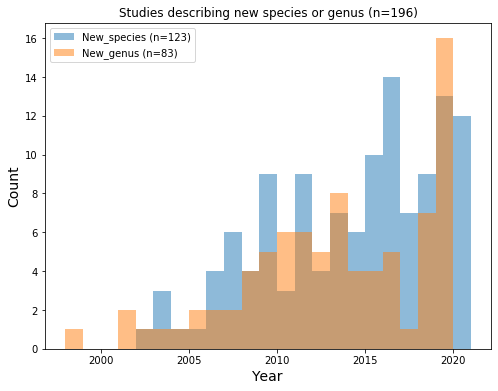

In [18]:
plt.figure(figsize=(8,6))
name = "Studies describing new species or genus"

fields = ["t.New_species", "t.New_genus"]
n_global = df[fields].notnull().any(axis=1).sum()

for set in fields:
    data = df[df[set] == 1]["c.year"]
    w = 1
    n = math.ceil((data.max() - data.min())/w)
    plt.hist(data, bins=n, alpha=0.5, label=f"{set[2:]} (n={data.shape[0]})")

plt.xlabel("Year", size=14)
plt.ylabel("Count", size=14)
plt.title(f"{name} (n={n_global})")
plt.legend(loc='upper left')

plt.savefig(f"./figs/{name.lower().replace(' ', '_')}", bbox_inches='tight')

plt.show()

In [50]:
# num papers in mex journals bars
#impact factor, year, #autors

#bivariate: impact factor and generation

In [51]:
## markers

In [19]:
df.columns

Index(['a.oldtitle', 'c.abstract', 'c.address', 'c.author', 'c.doi',
       'c.entrytype', 'c.eprint', 'c.id', 'c.issn', 'c.journal', 'c.month',
       'c.note', 'c.number', 'c.pages', 'c.publisher', 'c.title', 'c.url',
       'c.volume', 'c.year', 's.n_authors', 'v.simil_titles', 't.Mexico',
       't.Morphology', 't.First_gen.', 't.Second_gen.', 't.Third_gen.',
       't.Nuclear_info', 't.Chloroplast_info', 't.Parsimony',
       't.Maximum_likelihood', 't.Bayesian', 't.MSC', 't.New_species',
       't.New_genus', 's.country', 's.scimago', 's.sjr', 's.q', 's.h',
       's.opensource', 's.scielo', 't.markers', 't.species',
       't.endemicMXspecies', 's.includedEndemicMXSpp', 't.families',
       't.orders', 't.divisions'],
      dtype='object')

## TEXT STATISTICS

In [41]:
# OPENSOURCENESS AND LATINAMERICAN INDEXED PAPERS
fields = ['s.scimago', 's.opensource','s.scielo']

n_global = df.shape[0]


data = df[fields].sum()

    
data2 = df.groupby(['s.scimago', 's.opensource','s.scielo']).size().reset_index(name="Count")
    
f"From a total of {n_global} papers {data['s.scimago'] / n_global:.0%} \
were published in a journal found in SCImago database. From those, only {data['s.opensource']:.0f} ({(data['s.opensource']/data['s.scimago']):.0%}) \
were open source. From the grand total of papers published in journals indexed in SCImago, {data['s.scielo']:.0f} \
were reported in SciELO (bibliographic database: America, Iberian Peninsula, South Africa), \
from which {(data2['Count'][0]/data['s.scielo']):.0%} are open source"

'From a total of 3807 papers 93% were published in a journal found in SCImago database. From those, only 374 (11%) were open source. From the grand total of papers published in journals indexed in SCImago, 14 were reported in SciELO (bibliographic database: America, Iberian Peninsula, South Africa), from which 100% are open source'

In [36]:
papers_in_mx_journals = df[df["s.country"] == "Mexico"]
mx_journals = papers_in_mx_journals["c.journal"].unique()

f"{papers_in_mx_journals.shape[0]} papers have been published in {len(mx_journals)} Mexican journals \
indexed by SCImago ({', '.join(mx_journals)})"

'5 papers have been published in 2 Mexican journals indexed by SCImago (Botanical Sciences, Acta Botanica Mexicana)'

In [40]:
papers_with_endemic_spp = len(df["s.includedEndemicMXSpp"].dropna())

total_species = []
for index, row in df.iterrows():
    if not isinstance(row["t.species"], float):
        total_species.extend(row["t.species"].split(","))
n_species = len(set(total_species))

total_endemic_species = []
for index, row in df.iterrows():
    if not isinstance(row["t.endemicMXspecies"], float):
        total_endemic_species.extend(row["t.endemicMXspecies"].split(","))
print(total_endemic_species)
n_endemic_species = len(set(total_endemic_species))

f"From  23312 species reported by Villaseñor (2016) that occur in Mexico, only {n_species/23312:.0%} ({n_species} species) \
species have at least one report in Genbank. Taking into account only those that are \
endemic for Mexico (12013 species reported by Villaseñor, 2016), a total of {n_endemic_species} species \
({n_endemic_species/12013:.0%}) \
have been used by {papers_with_endemic_spp} papers analysed in this study."

TypeError: 'str' object is not callable

## Consider do all plots only for mexican species